<a href="https://colab.research.google.com/github/Aaditree/Forensic-Tool/blob/main/Spam_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==0.22.2.post1 #python 3


In [1]:
import pickle 
print(pickle.format_version)


4.0


In [2]:
import pandas as pd

data = pd.read_csv('/content/data.csv')
data.head(5)

,Unnamed: 0,class,message
0,0,1.0,Subject: naturally irresistible your corporate...
1,1,1.0,Subject: the stock trading gunslinger fanny i...
2,2,1.0,Subject: unbelievable new homes made easy im ...
3,3,1.0,Subject: 4 color printing special request add...
4,4,1.0,"Subject: do not have money , get software cds ..."


In [3]:
columns = ['class', 'message']
data = pd.DataFrame(data, columns=columns)

In [4]:
data.columns
#data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.columns

Index(['class', 'message'], dtype='object')

In [5]:
data.head(5)

,class,message
0,1.0,Subject: naturally irresistible your corporate...
1,1.0,Subject: the stock trading gunslinger fanny i...
2,1.0,Subject: unbelievable new homes made easy im ...
3,1.0,Subject: 4 color printing special request add...
4,1.0,"Subject: do not have money , get software cds ..."


In [6]:
data['class']=data['class'].map({'ham':0.0,'spam':1.0})

In [7]:
data.head(5)

,class,message
0,NaN,Subject: naturally irresistible your corporate...
1,NaN,Subject: the stock trading gunslinger fanny i...
2,NaN,Subject: unbelievable new homes made easy im ...
3,NaN,Subject: 4 color printing special request add...
4,NaN,"Subject: do not have money , get software cds ..."


In [6]:
data.shape

(11298, 2)

In [7]:
data.isnull().sum().sum()


0

In [8]:
data = data.dropna()
data = data.reset_index(drop=True)

In [9]:
data.isnull().sum().sum()


0

In [ ]:
#random forest




In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

y=data['class']
y=y.astype('int')
X= cv.fit_transform(data["message"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestClassifier(n_estimators=150,max_depth=None,n_jobs=-1)

model.fit(X_train, y_train)

prediction = model.predict(X_test)

print("Prediction: ",prediction)

print("Accuracy: ",metrics.accuracy_score(y_test,prediction))

Prediction:  [0 0 0 ... 0 0 0]
Accuracy:  0.9628318584070796


In [11]:
import pickle
pickle.dump(model, open("spam.pkl","wb"))
pickle.dump(cv, open("vectorizer.pkl","wb"))


In [16]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, prediction,labels=[1,0])
cm=pd.DataFrame(matrix,index=['positive','negative'],columns=['positive','negative'])
print(cm)

          positive  negative
positive       346        84
negative         0      1830


In [18]:
#Calculate Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,prediction)
print('Accuracy: ',acc)

#Calculate Recall
from sklearn.metrics import recall_score
recall= recall_score(y_test, prediction)
print('Recall: ',recall)

#Calculate Precision
from sklearn.metrics import precision_score
precision= precision_score(y_test, prediction)
print('Precision: ',precision)


Accuracy:  0.9628318584070796
Recall:  0.8046511627906977
Precision:  1.0


In [20]:
#F1 Score
from sklearn.metrics import f1_score
f1score= f1_score(y_test,prediction)
print("F1 Score: ",f1score)

F1 Score:  0.8917525773195877


In [22]:
#Calculate AUC 
from sklearn.metrics import roc_curve, auc
fpr, tpr, treshold = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)
print("AUC: ",roc_auc)

AUC:  0.9023255813953488


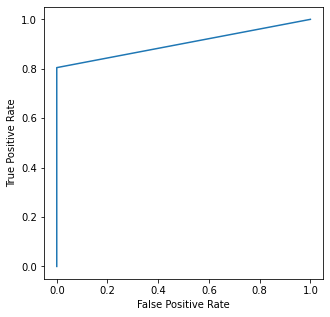

In [28]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(5,5))
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
#Calculate log loss
from sklearn.metrics import log_loss
logloss= log_loss(y_test,prediction)
print("Log Loss: ",logloss)

Log Loss:  1.2837421314922566


In [ ]:
#Naive Byes 
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

x = data['message']
y=data['class']


In [ ]:
x.shape


(11298,)

In [ ]:
y.shape

(11298,)

In [ ]:
x= cv.fit_transform(x)

In [ ]:
x

<11298x41274 sparse matrix of type '<class 'numpy.int64'>'
	with 779626 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)



In [ ]:
x_train.shape

(9038, 41274)

In [ ]:
y_train.shape

(9038,)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
model.score(x_test,y_test)

0.9367256637168142

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open("spam.pkl","wb"))

In [ ]:
pickle.dump(cv, open("vectorizer.pkl","wb"))

In [ ]:
data.to_csv('data.csv')

In [ ]:
import streamlit as st
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import smtplib
import time
import imaplib
import email
import traceback 
from bs4 import BeautifulSoup
import csv
from email import policy
from datetime import datetime
from win32com.client import Dispatch
import requests



ORG_EMAIL = "@gmail.com" 
FROM_EMAIL = "clearedaccess" + ORG_EMAIL 
FROM_PWD = "clear.access123@@@" 
SMTP_SERVER = "imap.gmail.com" 
SMTP_PORT = 993

ll=[]
full=[]

def read_email_from_gmail():
        mail = imaplib.IMAP4_SSL(SMTP_SERVER)
        mail.login(FROM_EMAIL,FROM_PWD)
        
        mail.list()
        mail.select('inbox')

        n=0
        (retcode, messages) = mail.search(None, '(UNSEEN)')
        if retcode == 'OK':

          for num in messages[0].split() :
            print ('Processing ')
            n=n+1
            typ, data = mail.fetch(num,'(RFC822)')
            for response_part in data:
              if isinstance(response_part, tuple):
                original = email.message_from_bytes(response_part[1])

                raw_email = data[0][1]
                raw_email_string = raw_email.decode('utf-8')
                email_message = email.message_from_string(raw_email_string)
              
                for part in email_message.walk():
                        if (part.get_content_type() == "text/plain"): # ignore attachments/html
                              body = part.get_payload(decode=True)
                              full.append([original['From'],original['Subject'],body.decode('utf-8') ])
                              fin = str(original['Subject'])+" : "+ str(body.decode('utf-8'))
                              ll.append([fin])
                              print(ll)
			       
                              
                        else:
                              continue
                with open('forensic_files.csv','w') as files:
                  csvwriter = csv.writer(files)
                  csvwriter.writerow(['From','Subject','Body'])
                  csvwriter.writerows(full)

                typ, data = mail.store(num,'+FLAGS','\\Seen')

                sd = ll
                for i in sd:
                  a = spam_not_spam(i)
                  if a==1:
                    mail.store(num,'+X-GM-LABELS','\Spam')
                    mail.store(num,'+FLAGS', '\\Deleted')

        return ll

def spam_not_spam(lst):
  row=[]
  vec=cv.transform(lst).toarray()
  result=model.predict(vec)
  if result[0]==0:
    return 0
  else:
    return 1
			


def speak(text):
	speak=Dispatch(("SAPI.SpVoice"))
	speak.Speak(text)


model = pickle.load(open('spam.pkl','rb'))
cv=pickle.load(open('vectorizer.pkl','rb'))

def main():
	st.title("Email Spam Classification")
	activites=["Automatic Forensic Classification","Manual Forensic Classification"]
	choices=st.sidebar.selectbox("Choose method",activites)
	if choices=="Automatic Forensic Classification":
		
		while(choices=="Automatic Forensic Classification"):
			
			now = datetime.now()
			nw=now.strftime("%d %m %Y %H %M %S")
			filename='forensic_file_'+str(nw)+'.csv'
			
			lst=read_email_from_gmail()
			row=[]
			for data in lst:
				print(data)
				vec=cv.transform(data).toarray()
				result=model.predict(vec)
				if result[0]==0:
					st.success("This is Not A Spam Email")
					row.append([data,'Not Spam'])
				else:
					st.error("This is A Spam Email")
					
					row.append([data,'Spam'])
					
			if len(row):
				with open(filename,'w') as csvfile:
					csvwriter=csv.writer(csvfile)
					csvwriter.writerow(['text','spam/not spam'])
					csvwriter.writerows(row)			
    

	elif choices=="Manual Forensic Classification":
		now = datetime.now()
		nw=now.strftime("%d %m %Y %H %M %S")
		filename='forensic_file_'+str(nw)+'.csv'
		print("Checking..." + "\n")
		print("Click on Process to get results")
		lst=[]

		if st.button("PROCESS"):
      
			row=[]
			lst=read_email_from_gmail()
			for data in lst:
				print(data)
				vec=cv.transform(data).toarray()
				result=model.predict(vec)
				if result[0]==0:
					st.success("This is Not A Spam Email")
					row.append([data,'Not Spam'])
	
				else:
					st.error("This is A Spam Email")
					row.append([data,'Spam'])
          

			if len(row):
				with open(filename,'w') as csvfile:
          csvwriter=csv.writer(csvfile) 
          csvwriter.writerow(['text','spam/not spam'])
					csvwriter.writerows(row)
			
			
		
		if st.button("RESET"):
			st.empty()
			st.success("Click on Process to run again")
			
		
	
main()


IndentationError: ignored

In [ ]:
import streamlit as st
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import smtplib
import time
import imaplib
import email
import traceback 
from bs4 import BeautifulSoup
import csv
from email import policy
from datetime import datetime
from win32com.client import Dispatch
import requests
import json

url = "https://www.fast2sms.com/dev/bulk"

headers = {
'authorization': "yAjeClukhD2MGx093RNobUwnLdrmp5ZJKsvB1QaPtfzVSIiO4qVBpJHqFYfSvOci4htoxar3wGP9KNXZ",
'Content-Type': "application/x-www-form-urlencoded",
'Cache-Control': "no-cache",
}


ORG_EMAIL = "@gmail.com" 
FROM_EMAIL = "clearedaccess" + ORG_EMAIL 
FROM_PWD = "clear.access123@@@" 
SMTP_SERVER = "imap.gmail.com" 
SMTP_PORT = 993

ll=[]
full=[]

def read_email_from_gmail():
        mail = imaplib.IMAP4_SSL(SMTP_SERVER)
        mail.login(FROM_EMAIL,FROM_PWD)
        
        mail.list()
        mail.select('inbox')

        n=0
        (retcode, messages) = mail.search(None, '(UNSEEN)')
        if retcode == 'OK':

          for num in messages[0].split() :
            print ('Processing ')
            n=n+1
            typ, data = mail.fetch(num,'(RFC822)')
            for response_part in data:
              if isinstance(response_part, tuple):
                original = email.message_from_bytes(response_part[1])

                raw_email = data[0][1]
                raw_email_string = raw_email.decode('utf-8')
                email_message = email.message_from_string(raw_email_string)
              
                for part in email_message.walk():
                        if (part.get_content_type() == "text/plain"): # ignore attachments/html
                              body = part.get_payload(decode=True)
                              full.append([original['From'],original['Subject'],body.decode('utf-8') ])
                              fin = str(original['Subject'])+" : "+ str(body.decode('utf-8'))
                              ll.append([fin])
                              print(fin)

                        else:
                              continue
                with open('forensic_files.csv','w') as files:
                  csvwriter = csv.writer(files)
                  csvwriter.writerow(['From','Subject','Body'])
                  csvwriter.writerows(full)

                typ, data = mail.store(num,'+FLAGS','\\Seen')
                mail.store(num, '+X-GM-LABELS', '(Spam)')
                my_data={'sender_id':'FSTSMS', 'message':'ALERT:'+data,'language':'english','route':'p','numbers':'9158074343'}
                response = requests.request("POST",url,data = my_data,headers = headers)
                    

                
        return ll

def spam_not_spam(lst):
  row=[]
  vec=cv.transform(lst).toarray()
  result=model.predict(vec)
  if result[0]==0:
    return 0
  else:
    return 1
			


def speak(text):
	speak=Dispatch(("SAPI.SpVoice"))
	speak.Speak(text)


model = pickle.load(open('spam.pkl','rb'))
cv=pickle.load(open('vectorizer.pkl','rb'))


def main():
	st.title("Email Spam Classification")
	activites=["Automatic Forensic Classification","Manual Forensic Classification"]
	choices=st.sidebar.selectbox("Choose method",activites)
	if choices=="Automatic Forensic Classification":
		
		while(choices=="Automatic Forensic Classification"):
			
			now = datetime.now()
			nw=now.strftime("%d %m %Y %H %M %S")
			filename='forensic_file_'+str(nw)+'.csv'
			lst=read_email_from_gmail()
			row=[]
			for data in lst:
				print(data)
				vec=cv.transform(data).toarray()
				result=model.predict(vec)
				if result[0]==0:
					st.success("This is Not A Spam Email")
					#row.append([data,'Not Spam'])
				else:
					st.error("This is A Spam Email")
					row.append([data,'Spam'])
					
			if len(row):
				with open(filename,'w') as csvfile:
					csvwriter=csv.writer(csvfile)
					csvwriter.writerow(['text','spam/not spam'])
					csvwriter.writerows(row)			
			
		

	elif choices=="Manual Forensic Classification":
		now = datetime.now()
		nw=now.strftime("%d %m %Y %H %M %S")
		filename='forensic_file_'+str(nw)+'.csv'
		print("Checking..." + "\n")
		print("Click on Process to get results")
		lst=[]
		

		if st.button("PROCESS"):
			row=[]
			lst=read_email_from_gmail()
			for data in lst:
				print(data)
				vec=cv.transform(data).toarray()
				result=model.predict(vec)
				if result[0]==0:
					st.success("This is Not A Spam Email")
					row.append([data,'Not Spam'])
	
				else:
					st.error("This is A Spam Email")
					row.append([data,'Spam'])
					

			if len(row):
				with open(filename,'w') as csvfile:
					csvwriter=csv.writer(csvfile)
					csvwriter.writerow(['text','spam/not spam'])
					csvwriter.writerows(row)
			
			
		
		if st.button("RESET"):
			st.empty()
			st.success("Click on Process to run again")
			
		
	
main()

ModuleNotFoundError: ignored

In [ ]:
response = requests.request("POST",url,data = my_data,headers = headers)

In [ ]:

!python -m tabnanny spamDetector.py


spamDetector.py 157 '          \t\t\t\tcsvwriter=csv.writer(csvfile) \n'
